# Training_stats visualisations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
stats = pd.read_csv("/net/tscratch/people/plgkdebowska/GraphSAGE/statisctics/training_stats.csv")

# sns.set(style="whitegrid")
palette={"unsup": "orchid", "sup": "darkorchid"}

In [58]:
stats.head(10)

,nodes,learning_type,model,max_total_steps,validate_iter,time
0,2708,unsup,mean,1000,10,13.924395
1,2708,unsup,maxpool,1000,10,23.766063
2,2708,unsup,meanpool,1000,10,22.206739
3,2708,unsup,gcn,1000,10,14.420274
4,2708,unsup,seq,1000,10,181.306904
5,2708,sup,mean,1000,10,1.827898
6,2708,sup,maxpool,1000,10,1.974291
7,2708,sup,meanpool,1000,10,1.928203
8,2708,sup,gcn,1000,10,1.523900
9,2708,sup,seq,1000,10,7.603914


Data division

In [7]:
sup_stats = stats[stats["learning_type"] == "sup"]
unsup_stats = stats[stats["learning_type"] == "unsup"]


## Mean time for different models
Represented on barplot

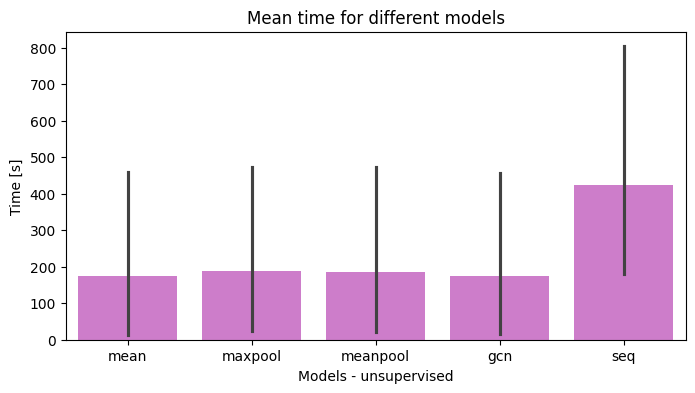

In [8]:
plt.figure(figsize=(8, 4))
sns.barplot(data=unsup_stats, x="model", y="time", hue="learning_type", dodge=False, palette=palette, legend=False)
plt.title("Mean time for different models")
plt.xlabel("Models - unsupervised")
plt.ylabel("Time [s]")
plt.show()

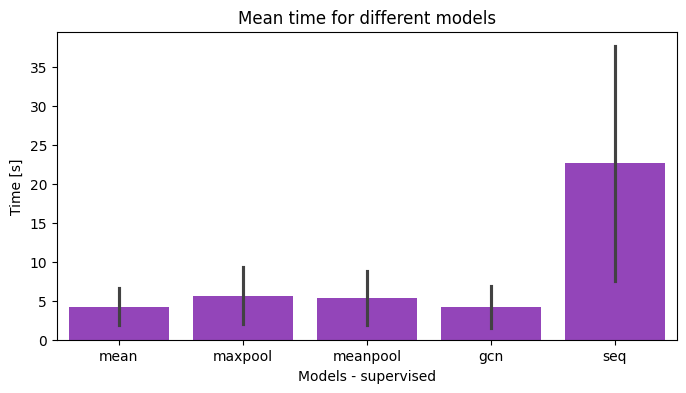

In [9]:
plt.figure(figsize=(8, 4))
sns.barplot(data=sup_stats, x="model", y="time", hue="learning_type", dodge=False, palette=palette, legend=False)
plt.title("Mean time for different models")
plt.xlabel("Models - supervised")
plt.ylabel("Time [s]")
plt.show()

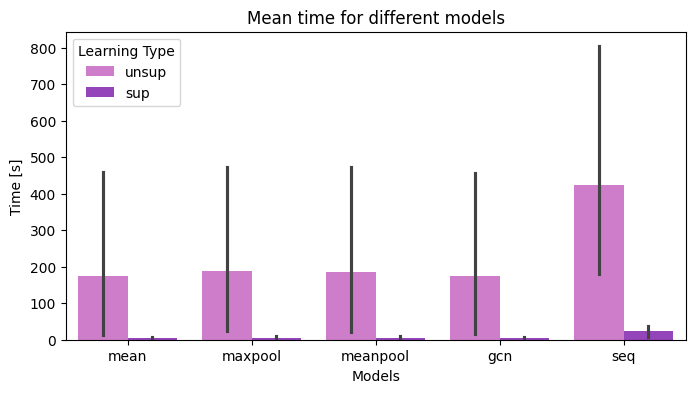

In [10]:
plt.figure(figsize=(8, 4))
sns.barplot(data=stats, x="model", y="time", hue="learning_type", palette=palette)
plt.title("Mean time for different models")
plt.xlabel("Models")
plt.ylabel("Time [s]")
plt.legend(title="Learning Type")
plt.show()

## Time according to the number of nodes
Represented in a line plot

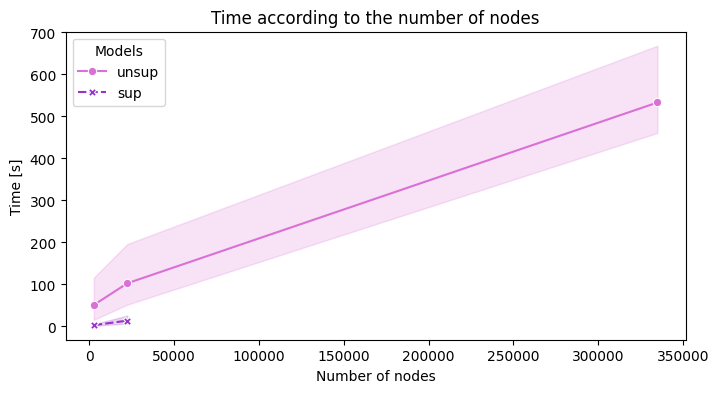

In [11]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=stats, x="nodes", y="time", hue="learning_type", style="learning_type", markers=True, palette=palette)
plt.title("Time according to the number of nodes")
plt.xlabel("Number of nodes")
plt.ylabel("Time [s]")
plt.legend(title="Models")
plt.show()

## Time for different combinations of models and learning types
Shown in the dot plot

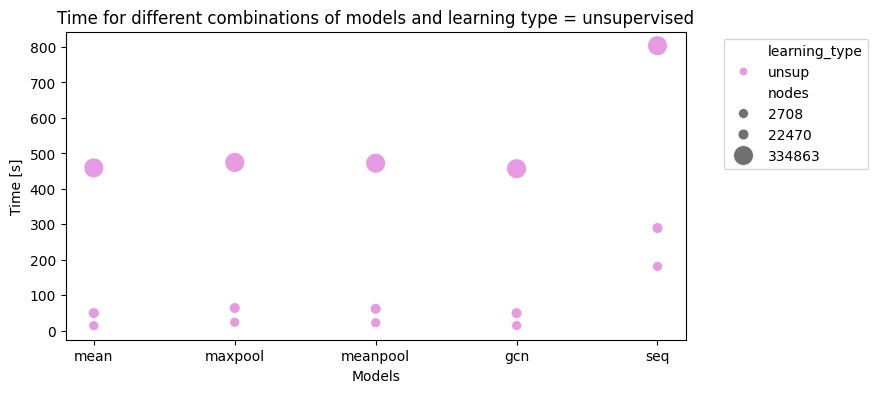

In [12]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=unsup_stats, x="model", y="time", hue="learning_type", size="nodes", sizes=(50, 200), alpha=0.7, palette=palette)
plt.title("Time for different combinations of models and learning type = unsupervised")
plt.xlabel("Models")
plt.ylabel("Time [s]")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

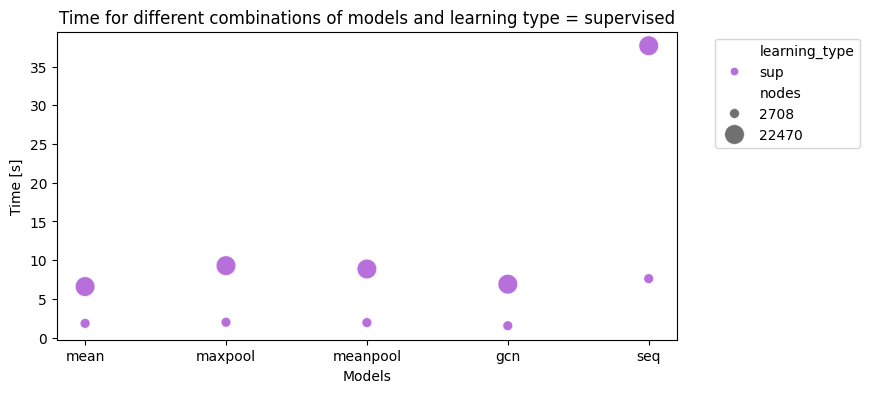

In [13]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=sup_stats, x="model", y="time", hue="learning_type", size="nodes", sizes=(50, 200), alpha=0.7, palette=palette)
plt.title("Time for different combinations of models and learning type = supervised")
plt.xlabel("Models")
plt.ylabel("Time [s]")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

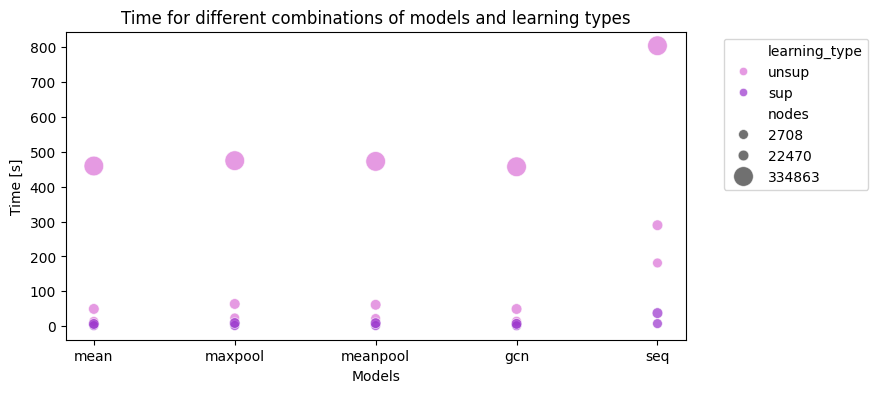

In [25]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=stats, x="model", y="time", hue="learning_type", size="nodes", sizes=(50, 200), alpha=0.7, palette=palette)
plt.title("Time for different combinations of models and learning types")
plt.xlabel("Models")
plt.ylabel("Time [s]")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Time distribution for different types of learning
Represented by a box plot

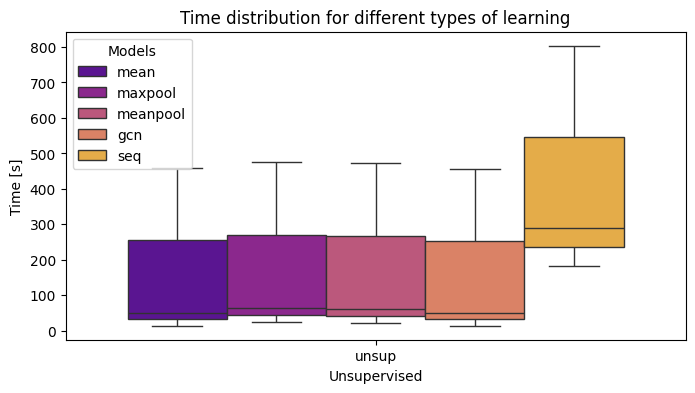

In [15]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=unsup_stats, x="learning_type", y="time", hue="model", palette = "plasma")
plt.title("Time distribution for different types of learning")
plt.xlabel("Unsupervised")
plt.ylabel("Time [s]")
plt.legend(title="Models")
plt.show()

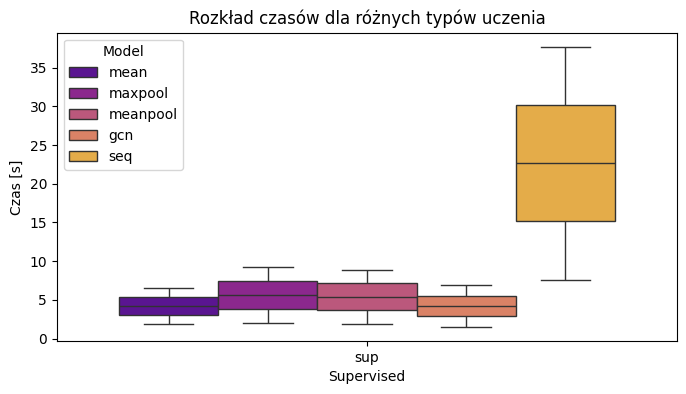

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=sup_stats, x="learning_type", y="time", hue="model", palette = "plasma")
plt.title("Rozkład czasów dla różnych typów uczenia")
plt.xlabel("Supervised")
plt.ylabel("Czas [s]")
plt.legend(title="Model")
plt.show()

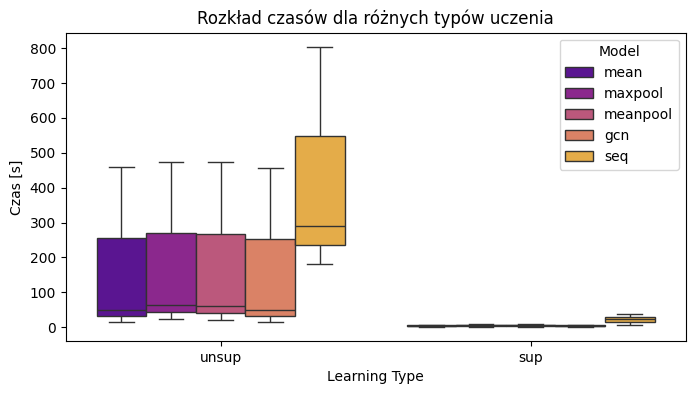

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=stats, x="learning_type", y="time", hue="model", palette = "plasma")
plt.title("Rozkład czasów dla różnych typów uczenia")
plt.xlabel("Learning Type")
plt.ylabel("Czas [s]")
plt.legend(title="Model")
plt.show()

## Mean time for models and number of nodes
Presented on heatmap

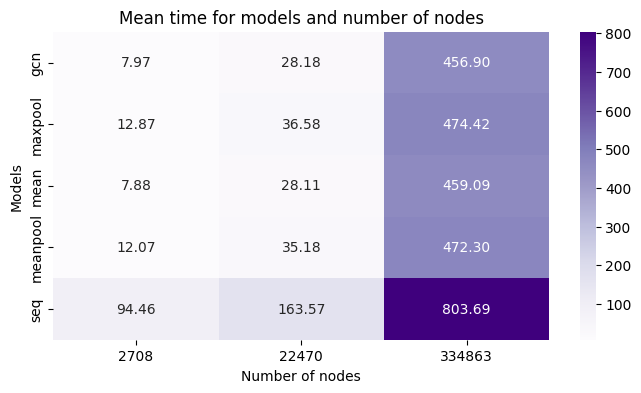

In [18]:
heatmap_data = stats.pivot_table(index="model", columns="nodes", values="time", aggfunc="mean")
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Purples")
plt.title("Mean time for models and number of nodes")
plt.xlabel("Number of nodes")
plt.ylabel("Models")
plt.show()

## Graph representing models and learning types with time as edge weight

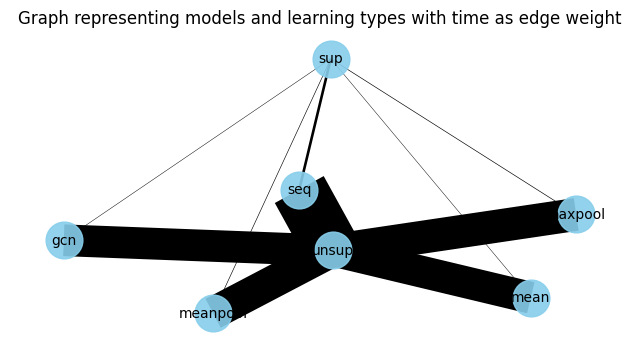

In [19]:
import networkx as nx

G = nx.Graph()

# adding nodes (models)
for model in stats['model'].unique():
    G.add_node(model)

# adding edges (based on learning_type and time)
for _, row in stats.iterrows():
    G.add_edge(row['model'], row['learning_type'], weight=row['time'])

plt.figure(figsize=(8, 4))
pos = nx.spring_layout(G)  # Layout for nodes

nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', alpha=0.9)

# thickness proportional to the time
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] / 20 for (_, _, d) in edges])

nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title("Graph representing models and learning types with time as edge weight")
plt.axis("off")
plt.show()


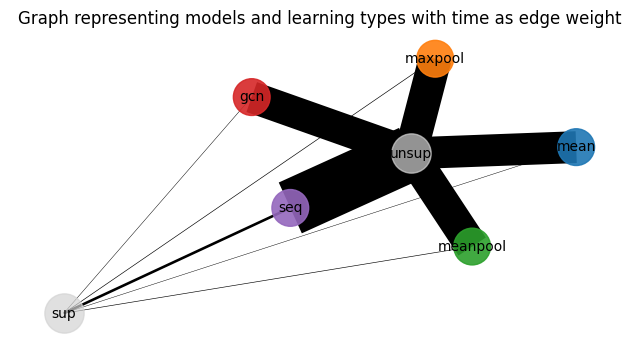

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for model in stats['model'].unique():
    G.add_node(model)

for _, row in stats.iterrows():
    G.add_edge(row['model'], row['learning_type'], weight=row['time'])

unique_models = stats['model'].unique()
model_colors = {model: color for model, color in zip(unique_models, plt.cm.tab10(range(len(unique_models))))}

plt.figure(figsize=(8, 4))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(
    G, pos, nodelist=[model for model in stats['model'].unique()],
    node_color=[model_colors[model] for model in stats['model'].unique()],
    node_size=700, alpha=0.9
)

nx.draw_networkx_nodes(
    G, pos, nodelist=stats['learning_type'].unique(),
    node_color='lightgray', node_size=800, alpha=0.7
)

edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] / 20 for (_, _, d) in edges])

nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title("Graph representing models and learning types with time as edge weight")
plt.axis("off")
plt.show()
